# Univariate Time Series Forecasting




In [1]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [2]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [3]:
#load data
df = pd.read_csv("/content/SeriesReport-202506100740.csv", skiprows=7)

In [4]:
#renamining columns
df.columns = ['date','sales']
df

,date,sales
0,Jan-2014,7071.0
1,Feb-2014,7100.0
2,Mar-2014,7966.0
3,Apr-2014,7654.0
4,May-2014,8244.0
...,...,...
139,Aug-2025,NaN
140,Sep-2025,NaN
141,Oct-2025,NaN
142,Nov-2025,NaN


In [5]:
# droping all null values
df.dropna(inplace=True)
df

,date,sales
0,Jan-2014,7071.0
1,Feb-2014,7100.0
2,Mar-2014,7966.0
3,Apr-2014,7654.0
4,May-2014,8244.0
...,...,...
131,Dec-2024,12455.0
132,Jan-2025,10414.0
133,Feb-2025,10444.0
134,Mar-2025,11565.0


In [6]:
# get quick overview of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136 entries, 0 to 135
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    136 non-null    object 
 1   sales   136 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.3+ KB


In [7]:
# converting date colun from object datatype to date datatype
df["date"]= pd.to_datetime(df["date"])

/tmp/ipython-input-4092536067.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"]= pd.to_datetime(df["date"])


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136 entries, 0 to 135
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    136 non-null    datetime64[ns]
 1   sales   136 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.3 KB


In [9]:
df.head()

,date,sales
0,2014-01-01,7071.0
1,2014-02-01,7100.0
2,2014-03-01,7966.0
3,2014-04-01,7654.0
4,2014-05-01,8244.0


In [10]:
#setting date colun as index
df.set_index("date",inplace=True)

# Checking stationarity of given series

* Mean and Variance should be constant over time.No seasonallity should be present

In [11]:
#import adfuller function from statsmodels library
from statsmodels.tsa.stattools import adfuller

# function to test stationarity of given series
def check_stationarity(series):
  result = adfuller(series)
  test_statistic,p_value=result[0],result[1]
  print('ADF Test Statistic:', test_statistic)
  print('p-value:', p_value)
  if p_value<0.05:
    print("p-value is less than 0.05 hence given series is stationary")
  else:
    print("p-value is more than or equal to 0.05 hence given series is not stationary")


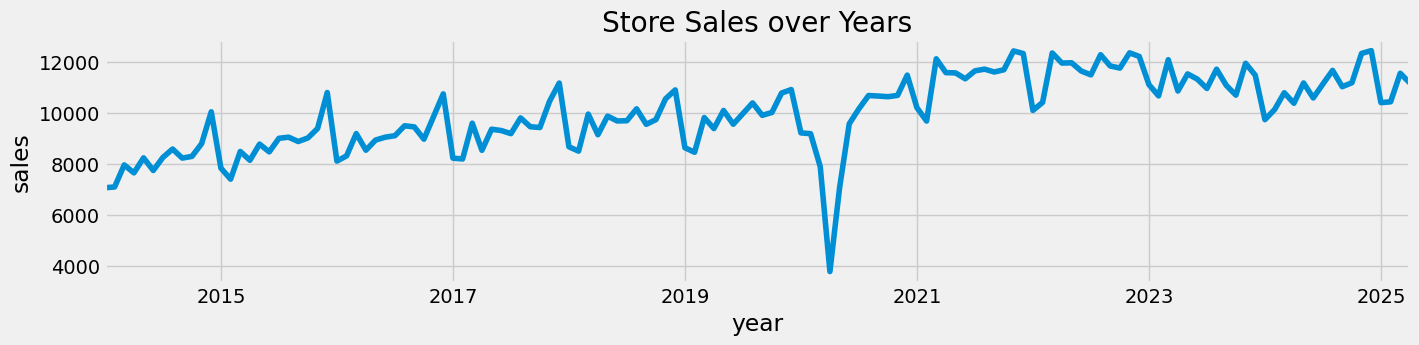

ADF Test Statistic: -1.3990930443091605
p-value: 0.5827108471617195
p-value is more than or equal to 0.05 hence given series is not stationary


In [12]:
# plotting the sales trend over years
plt.figure(figsize=(15,3))
df["sales"].plot()
plt.title("Store Sales over Years")
plt.xlabel("year")
plt.ylabel("sales")
plt.show()

# checking if given series is stationary using ADF test
check_stationarity(df["sales"])

how to make series stationary?

* use differencing technique

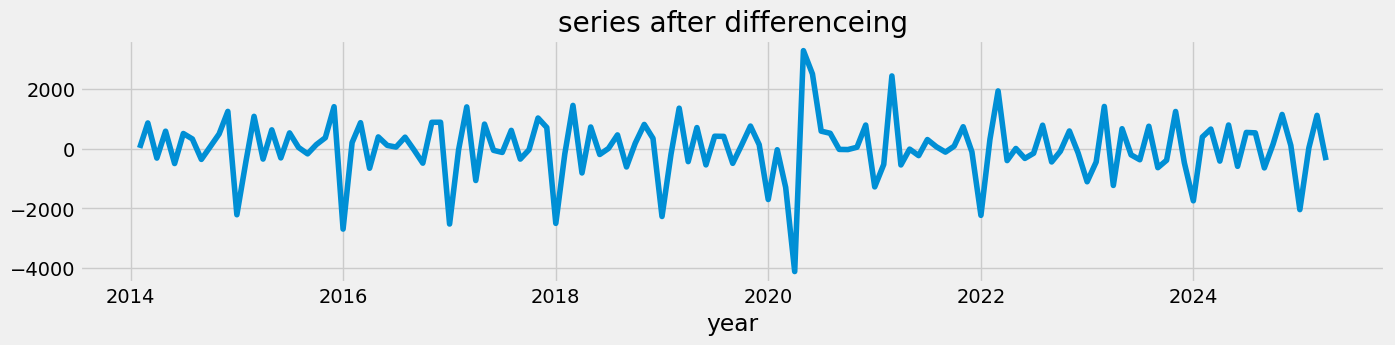

ADF Test Statistic: -3.584929860194321
p-value: 0.00605575913493128
p-value is less than 0.05 hence given series is stationary


In [13]:
# taking 1st level of differencing
df1= df.diff()
df1.dropna(inplace=True)

#plotting the sales trend over years
plt.figure(figsize=(15,3))
plt.plot(df1["sales"])
plt.title("series after differenceing")
plt.xlabel("year")
plt.show()

# checking if series is stationary after 1st level of differencing
check_stationarity(df1["sales"])

# Univariate Time Series Models

*   ARIMA stands for AutoRegressive Integrated Moving Average
*   SARIMAX stands for Seasonal AutoRegressive Integrated Moving Average with eXogenous variables.



# How to find value of AR(p),I(d),MA(q)?

*   Use PACF AND ACF plots to find value of p and q.
*   We have already found value of d as 1 as we have differenced our series for 1st time to make series stationary.


Plot PACF and ACF to identify potential values for p(AR) and q(MA) parameters



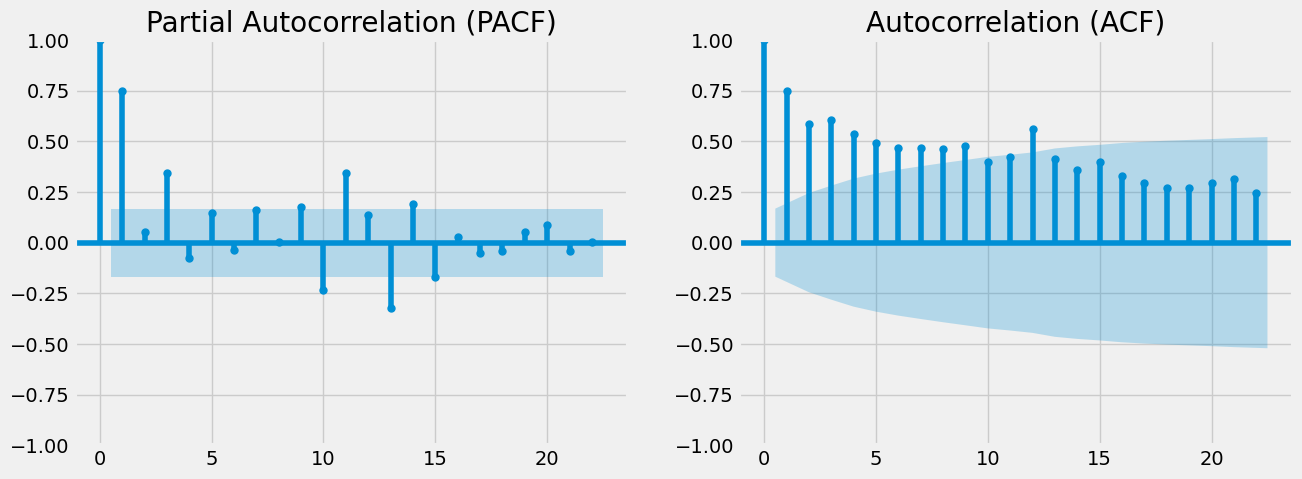

In [14]:
# import plot_acf,plot_pacf functions from statsmodels library
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# create a 1-row, 2-column subplot
fig, ax = plt.subplots(1,2, figsize = (14,5))

#plot PACF on the first subplot
plot_pacf(df["sales"], ax=ax[0])
ax[0].set_title("Partial Autocorrelation (PACF)")

#plot ACF on the second subplot
plot_acf(df["sales"], ax=ax[1])
ax[1].set_title("Autocorrelation (ACF)")

plt.show()




p=1,d=1,q=1

# Model Buillding

We will build the model on training data and on testing data will test the model and then will compare actual and predicted values.

In [15]:
# prompt: splitting the DataFrame into training and testing datasets

# split data into training and testing datasets
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

Training data shape: (108, 1)
Testing data shape: (28, 1)


In [16]:
# splitting the DataFrame into training and testing datasets
train_df = df[:-12]
test_df = df[-12:]

# Building ARIMA Model on Training Data

In [17]:
# import ARIMA class from statsmodels library
from statsmodels.tsa.arima.model import ARIMA

# create instance of ARIMA claass
model_arima = ARIMA(train_df["sales"], order=(1,1,1))

# build the ARIMA Model
model_fit = model_arima.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [18]:
# Summary function will help to have closer look at statistical values
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  124
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1016.629
Date:                Thu, 18 Sep 2025   AIC                           2039.258
Time:                        11:40:51   BIC                           2047.694
Sample:                    01-01-2014   HQIC                          2042.685
                         - 04-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4562      0.121      3.781      0.000       0.220       0.693
ma.L1         -0.8423      0.081    -10.453      0.000      -1.000      -0.684
sigma2      8.548e+05   6.54e+04     13.062      0.0

In [19]:
len(train_df),len(test_df)

(124, 12)

In [20]:
#forecasting next 12 months
n_forecast = 12

# getting predictions for the forecast period (predictions for testing data)
predict = model_fit.predict(start=len(train_df),end=len(train_df)+n_forecast-1)

#renaming series for clarity
predict.rename("predicted",inplace=True)

predict

,predicted
2024-05-01,10610.428361
2024-06-01,10711.908466
2024-07-01,10758.207471
2024-08-01,10779.330802
2024-09-01,10788.968053
2024-10-01,10793.364926
2024-11-01,10795.370943
2024-12-01,10796.286163
2025-01-01,10796.703720
2025-02-01,10796.894225


In [21]:
# creating new DataFrame to store predictions
pred_df = pd.DataFrame(predict)

#renaiming columns for clarity
pred_df.columns=["predicted_sales"]

#rounding off the values to zero decimal places
pred_df["predicted_sales"]=round(pred_df["predicted_sales"],0)

pred_df

,predicted_sales
2024-05-01,10610.0
2024-06-01,10712.0
2024-07-01,10758.0
2024-08-01,10779.0
2024-09-01,10789.0
2024-10-01,10793.0
2024-11-01,10795.0
2024-12-01,10796.0
2025-01-01,10797.0
2025-02-01,10797.0


In [22]:
# creating new DataFrame to store actual test data along with prediction by ARIMA model
actual_vs_pred=pd.concat([test_df,pred_df],axis=1)

# checking error inn actual and predicted values
actual_vs_pred["error"]=actual_vs_pred["sales"]-actual_vs_pred["predicted_sales"]

# renaming columns for clarity
actual_vs_pred.rename(columns={"sales":"actual_sales"},inplace=True)

actual_vs_pred

,actual_sales,predicted_sales,error
2024-05-01,11186.0,10610.0,576.0
2024-06-01,10597.0,10712.0,-115.0
2024-07-01,11145.0,10758.0,387.0
2024-08-01,11679.0,10779.0,900.0
2024-09-01,11038.0,10789.0,249.0
2024-10-01,11194.0,10793.0,401.0
2024-11-01,12345.0,10795.0,1550.0
2024-12-01,12455.0,10796.0,1659.0
2025-01-01,10414.0,10797.0,-383.0
2025-02-01,10444.0,10797.0,-353.0


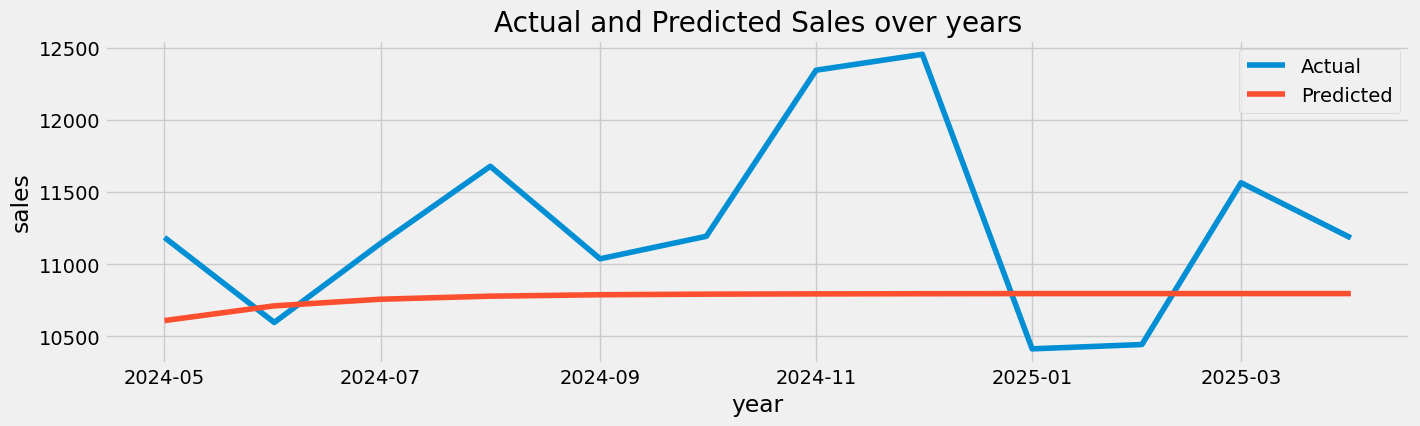

In [23]:
# plotting actual and predicted sales for test data for comparision
plt.figure(figsize=(15,4))
plt.plot(actual_vs_pred["actual_sales"],label="actual")
plt.plot(actual_vs_pred["predicted_sales"],label="predicted")
plt.title("Actual and Predicted Sales over years")
plt.xlabel("year")
plt.ylabel("sales")
plt.legend(["Actual","Predicted"])
plt.show()

In [24]:
# # step 1: uninstall conflicting packages
# !pip uninstall -y numpy pmdarima numba tensorflow scipy scikit-learn

# # step 2 install compatible versions
# !pip install numpy==1.26.0
# !pip install numba==0.58.0
# !pip install tensorflow==2.13.0 # Uncomment if you need tensorflow
# !pip install scipy==1.11.3
# !pip install scikit-learn==1.3.1
# !pip install pmdarima==2.0.4 --no-cache-dir

In [25]:
# import auto_arima function from pmdarima library
from pmdarima import auto_arima

# passing non stationary data to auto_arima function
auto_arima_result= auto_arima(train_df["sales"],seasonal=True,m=12)

In [26]:
# summary function will help to have closer look at statistical values
print(auto_arima_result.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  124
Model:             SARIMAX(0, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -989.614
Date:                              Thu, 18 Sep 2025   AIC                           1989.227
Time:                                      11:42:16   BIC                           2003.288
Sample:                                  01-01-2014   HQIC                          1994.939
                                       - 04-01-2024                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0724      0.052     -1.397      0.163      -0.174       0.029
ma.L2         -0.49

In [27]:
auto_arima_result.order,auto_arima_result.seasonal_order

((0, 1, 2), (1, 0, 1, 12))

In [28]:
# import Sarimax class from statsmodels library
from statsmodels.tsa.statespace.sarimax import SARIMAX

# create instances of SARIMAX class asn providing values of non-seasonal and seasonal order given by auto_arima function
model_sarimax= SARIMAX(train_df["sales"],order=auto_arima_result.order,seasonal_order=auto_arima_result.seasonal_order)

# build the SARIMAX model
model_fit=model_sarimax.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [29]:
# time_period in months for which we are forecasting sales
n_forecast = 12

#predict function will return series with predicted values for testing data
pred_values =model_fit.predict(start=len(train_df),end=len(train_df)+n_forecast-1)

#renaming columns
pred_values=pred_values.rename("predicted",inplace=True)

#creating  new dataFrame to store predicted values for test data
pred_df=pd.DataFrame(pred_values)

# rounding off values to zero decimal places
pred_df["predicted"]=round(pred_df["predicted"],0)

pred_df

,predicted
2024-05-01,11199.0
2024-06-01,11013.0
2024-07-01,11090.0
2024-08-01,11503.0
2024-09-01,11208.0
2024-10-01,11144.0
2024-11-01,11717.0
2024-12-01,11890.0
2025-01-01,10454.0
2025-02-01,10418.0


In [30]:
# creating new dataFrame to store actual test data along with predictions by SARIMAX model
actual_vs_pred_df=pd.concat([test_df,pred_df],axis =1)

# checking error in actual and predicted values
actual_vs_pred_df["error"]=actual_vs_pred_df["sales"]-actual_vs_pred_df["predicted"]

#renaming columns
actual_vs_pred_df.rename(columns={"sales": "actual_sales"},inplace=True)
actual_vs_pred_df.rename(columns={"predicted":"predicted_sales"},inplace=True)

actual_vs_pred_df

,actual_sales,predicted_sales,error
2024-05-01,11186.0,11199.0,-13.0
2024-06-01,10597.0,11013.0,-416.0
2024-07-01,11145.0,11090.0,55.0
2024-08-01,11679.0,11503.0,176.0
2024-09-01,11038.0,11208.0,-170.0
2024-10-01,11194.0,11144.0,50.0
2024-11-01,12345.0,11717.0,628.0
2024-12-01,12455.0,11890.0,565.0
2025-01-01,10414.0,10454.0,-40.0
2025-02-01,10444.0,10418.0,26.0


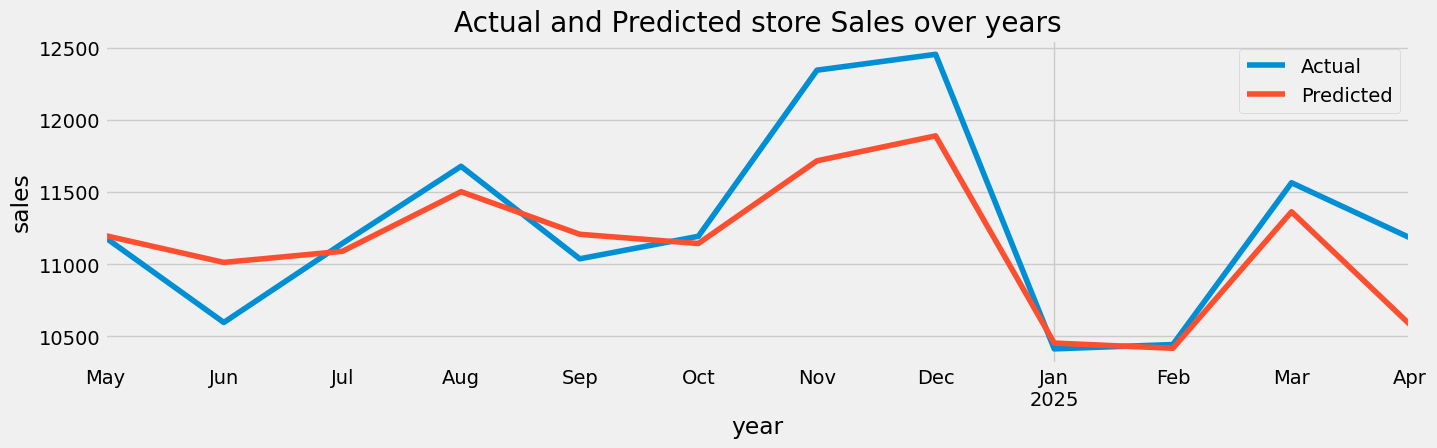

In [31]:
# plotting actual and predicted values over years
plt.figure(figsize=(15,4))
actual_vs_pred_df["actual_sales"].plot()
actual_vs_pred_df["predicted_sales"].plot()
plt.title("Actual and Predicted store Sales over years")
plt.xlabel("year")
plt.ylabel("sales")
plt.legend(["Actual","Predicted"])
plt.show()

# Building SARIMAX model on entire data

In [32]:
# passing non stationary data to auto_arima function
auto_arima_result = auto_arima(df["sales"],seasonal=True,m=12)

In [33]:
# summary function will help to have closer look at statistical values
print(auto_arima_result.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  136
Model:             SARIMAX(0, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1079.558
Date:                              Thu, 18 Sep 2025   AIC                           2171.116
Time:                                      11:43:17   BIC                           2188.548
Sample:                                  01-01-2014   HQIC                          2178.200
                                       - 04-01-2025                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.0387      3.131      0.332      0.740      -5.098       7.176
ma.L1         -0.06

In [34]:
# create instance of SARIMAX class and providing values of non-seasonal and seasonal order given by auto_arima function
model_sarimax= SARIMAX(df["sales"],order=auto_arima_result.order,seasonal_order=auto_arima_result.seasonal_order)

# Building SARIMAX model
model_fit=model_sarimax.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [35]:
# time period in months for which we are forecasting sales
n_forecast = 12

# predict function will return series with predicted values
pred_values = model_fit.predict(start=len(df),end=len(df) + n_forecast -1)

#renaming columns
pred_values=pred_values.rename("predicted",inplace=True)

# creating new dataFrame to store predicted values
pred_df=pd.DataFrame(pred_values)

# rounding off values to zero decimal places
pred_df["predicted"]=round(pred_df["predicted"],0)

pred_df

,predicted
2025-05-01,11824.0
2025-06-01,11570.0
2025-07-01,11757.0
2025-08-01,12160.0
2025-09-01,11844.0
2025-10-01,11823.0
2025-11-01,12402.0
2025-12-01,12760.0
2026-01-01,11143.0
2026-02-01,11083.0


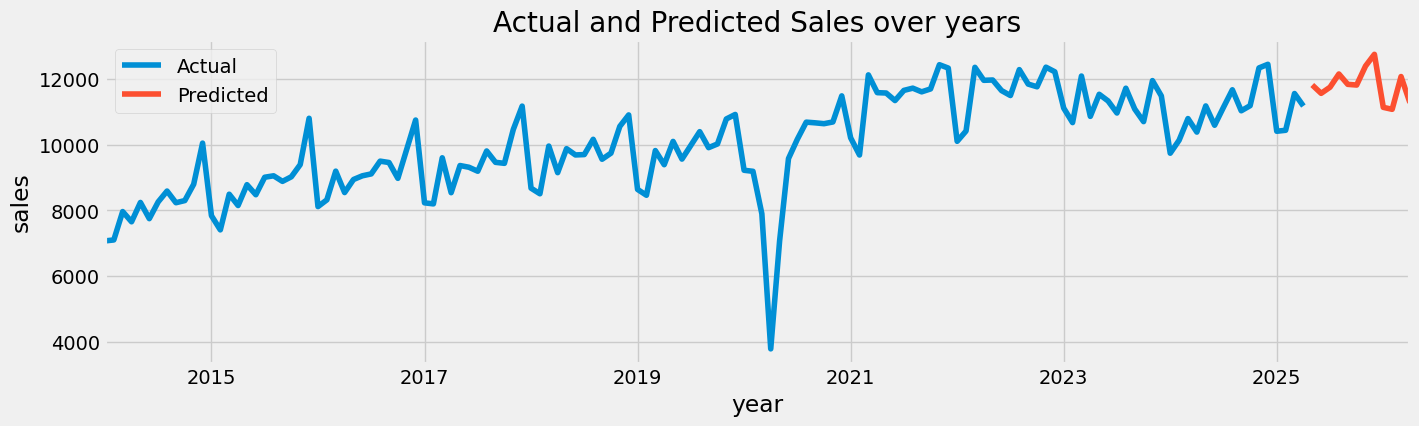

In [36]:
# plotting actual and predicted values
plt.figure(figsize=(15,4))
df["sales"].plot(legend=True,label="Actual")
pred_df["predicted"].plot(legend=True,label="Predicted")
plt.title("Actual and Predicted Sales over years")
plt.xlabel("year")
plt.ylabel("sales")
plt.show()